# P9 Produisez une étude de marché avec R ou Python

# Importation de librairies

In [524]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [525]:
# On cherche à afficher seulement deux décimales pour les nombres dans votre dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# CREATION DU TABLEAU 

# Importation des données

Importons maintenant les données que nous utiliserons pour notre analyse.  
Ces dernières sont stockées dans des fichier CSV nommés "DisponibiliteAlimentaire_2017.csv" et "Population_2000_2018.csv". La fonction **.read_csv()** nous permettra de les lire .  

Nous les sauvegardons dans des variables **dispo_alimentaire** et **population**

In [526]:
dispo_alimentaire= pd.read_csv("DisponibiliteAlimentaire_2017.csv")

In [527]:
population= pd.read_csv("Population_2000_2018.csv")

La disponibilité alimentaire (dans le cadre des BA) désigne les quantités d’un produit (qu’il soit brut, transformé ou semi-transformé, y compris les boissons) disponibles au niveau du commerce de détail pour la consommation de la population résidente du pays durant une période de référence donnée.

# Affichage des données
Examinons les cinq premières lignes de nos données en utilisant la méthode **.head()**.

In [528]:
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées


Sans avoir besoin de faire une analyse poussée on voit au premier coup d'oeil que certaine colonnes s'avereront inutile du fait du peu d'information qu'elles apportent. Au rang de ces colonnes figurent :
- Code Domaine
- Domaine
- Code zone, 
- Code Élément,
- Code Produit,
- Code année,
- Année,
- Symbole,
- Description du Symbole  

On utilise la méthode **.drop()** afin de les supprimer.


In [529]:
dispo_alimentaire = dispo_alimentaire.drop(["Code Domaine",
                                    "Domaine",
                                    "Code zone", 
                                    "Code Élément",
                                    "Code Produit",
                                    "Code année",
                                    "Année",
                                    "Symbole",
                                    "Description du Symbole"], axis=1)

On affiche les 5 premières lignes de ce df 

In [530]:
dispo_alimentaire.head()

,Zone,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.00
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.00


## Informations sur les données

Il est important de connaître la **structure de nos données** avant de commencer notre analyse. Utilisons pour cela, la méthode **.info()** afin d'afficher des informations sur nos données, telles que:
- **le nombre de lignes et de colonnes**
- **le type de données de chaque colonne**
- **le nombre de valeurs non nulles dans chaque colonne.**

In [531]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  object 
 1   Élément  176600 non-null  object 
 2   Produit  176600 non-null  object 
 3   Unité    176600 non-null  object 
 4   Valeur   176600 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.7+ MB


On remarque que le df est composé de **5 colonnes et 176.600 lignes toutes non nulles**

 # Gestion des doublons

In [532]:
dispo_alimentaire.duplicated().sum()

0

Parfait ! **Aucun doublon** dans notre df.

# Création d'un tableau croisé

Pour créer une table pivot nous utliserons la méthode **.pivot_table()**.

In [533]:
df_dispo_alimentaire= pd.pivot_table(dispo_alimentaire, columns=["Élément"], index=["Zone"], values= "Valeur", aggfunc=sum).reset_index()

Nous avons:
- spécifier que la colonne **"Élément"** doit être utilisée comme **colonne** de la table pivot
- spécifier que la colonne **"Zone"** doit être utilisée comme **index** de la table croisée
- spécifier que la colonne **"Valeur"** doit être utilisée comme **valeur** de la table croisée
- spécifier que la fonction d'agrégation **sum** doit être utilisée pour agréger les valeurs dans la table croisée.  

Jeton un oeil au cinq première lignes de notre df

In [534]:
df_dispo_alimentaire.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,456.00,94.00,1997.00,357.31,30.63,54.09,15139.00,601.00,4555.00,12968.00,1146.00,11609.00,-111.00,470.00,115.00,426.00
1,Afrique du Sud,0.00,9371.00,1448.00,2987.00,556.42,81.92,83.36,66840.00,10968.00,9020.00,31726.00,3108.00,68455.00,-594.00,212.00,21564.00,-322.00
2,Albanie,NaN,697.00,177.00,3400.00,1260.49,117.57,119.50,4879.00,156.00,884.00,3631.00,321.00,4231.00,-115.00,53.00,113.00,72.00
3,Algérie,0.00,4884.00,2405.00,3345.00,798.71,79.62,92.85,45365.00,743.00,19718.00,33056.00,3683.00,26763.00,-22.00,358.00,993.00,374.00
4,Allemagne,NaN,30904.00,8316.00,3559.00,943.24,147.96,104.07,174960.00,58793.00,66550.00,77988.00,5756.00,167828.00,-831.00,1712.00,51109.00,651.00


Toutes leS valeurs de la colonne Element ont été changé en colonne et chaque pays est en index, les informations sont bien plus faciles à lire car agrégées;

## Informations sur les données

Comme précéddement nous allons nous pencher sur la **structure de nos données**. Utilisons pour cela, la méthode **.info()** afin d'afficher des informations sur nos données, telles que:
- **le nombre de lignes et de colonnes**
- **le type de données de chaque colonne**
- **le nombre de valeurs non nulles dans chaque colonne.**

In [535]:
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           174 non-null    object 
 1   Alimentation pour touristes                                    79 non-null     float64
 2   Aliments pour animaux                                          174 non-null    float64
 3   Autres utilisations (non alimentaire)                          174 non-null    float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

On se trouve maintenant à un carrefour, la question à laquelle on doit répondre n'est pas simplement, comment gérer les colonnes comportant des valeurs nulles, car on se rend bien compte qu'à part la colonne **"Alimentation pour touristes"** qui ne comprend que 79 valeurs et est donc inutilisable, toutes les autres présentes un nombre de valeurs non nulles satisfaisant.  

La question est ici de savoir, plus largement, **"Comment gérer cette analyse ?"**. De la réponse à cette question découlera toute simplement la réponse à l'interrogation **_Quelles colonnes allons nous garder ?_"**

L'objectif principal de notre mission est de **regrouper des pays en des groupes similaires.** Mais quelles similarités veut-on souligner ?
- Dans un premier temps il serait judicieux de **grouper les pays par disponibilité alimentaire en Kg ou To par anéee**. Il faut noter que, dans le cadre des bilans alimentaires la disponibilité alimentaire **_désigne les quantités d’un produit (qu’il soit brut, transformé ou semi-transformé, y compris les boissons) disponibles au niveau du commerce de détail pour la consommation de la population résidente du pays durant une période de référence donnée_**.  

- Ensuite, on ajoutera une colonne concernant la taille du marché alimentaire en ce qui concerne la viande de volaille.  

- Enfin, on ajoutera l'information concernant la taille de la population.

Peut-être que ces critère ne suffiront pas, le cas échéant on ajoutera d'autres colonnes afin de différencier d'avantage nos pays . 

On utilise la méthode .drop() et on sauvegarde notre nouveau df dans une variable **dispo_alimentaire_reduite**

In [536]:
dispo_alimentaire_reduite= df_dispo_alimentaire.drop(["Alimentation pour touristes",
                                            "Aliments pour animaux",
                                            "Autres utilisations (non alimentaire)",
                                            "Disponibilité alimentaire (Kcal/personne/jour)",
                                            "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                            "Disponibilité intérieure",
                                            "Importations - Quantité",
                                            "Exportations - Quantité",
                                            "Nourriture",
                                            "Production",
                                            "Pertes",
                                            "Résidus",
                                            "Semences",
                                            "Traitement",
                                            "Variation de stock",
                                            "Disponibilité de protéines en quantité (g/personne/jour)"
                                            ], axis=1)

Jeton un oeil au cinq première lignes de notre df

In [537]:
dispo_alimentaire_reduite.head()

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,357.31
1,Afrique du Sud,556.42
2,Albanie,1260.49
3,Algérie,798.71
4,Allemagne,943.24


## Informations sur les données

A nouveau, nous allons nous pencher sur la **structure de nos données**. Utilisons pour cela, la méthode **.info()** afin d'afficher des informations sur nos données, telles que:
- **le nombre de lignes et de colonnes**
- **le type de données de chaque colonne**
- **le nombre de valeurs non nulles dans chaque colonne.**

In [538]:
dispo_alimentaire_reduite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    174 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


On voit que nous avons **deux valeurs manquantes pour les colonnes** : 
- Disponibilité alimentaire en quantité (kg/personne/an)
- Disponibilité de protéines en quantité (g/personne/jour) on utlise la méthode .isnull() pour les débusquer

In [539]:
dispo_alimentaire_reduite[dispo_alimentaire_reduite.isnull().any(axis=1)]

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an)
18,Bermudes,NaN
22,Brunéi Darussalam,NaN


On supprime ces deux lignes grace à la méthode **.dropna()**

In [540]:
dispo_alimentaire_reduite.dropna(inplace=True)

On vérifie qu'elles ont bien été supprimées:

In [541]:
dispo_alimentaire_reduite[dispo_alimentaire_reduite.isnull().any(axis=1)]

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an)


# Création d'un df concernant la viande de volailles

_Dans cette partie on va faire ce qu'on a fait précedemment en l'appliquant à la viande de volailles.  
Ce qu'on veut savoir c'est quelle est la taille du marché de la viande de volaille dans chaque pays ?_

On utilise la méthode .loc pour isoler la disponibilité alimentaire de viande de volaille qu'on sauvegarde dans un df **disponibilite_alimentaire_volailles**

In [542]:
disponibilite_alimentaire_volailles = dispo_alimentaire.loc[dispo_alimentaire["Produit"]== "Viande de Volailles"]

On jette un oeil aux 5 premières lignes de notres df 

In [543]:
disponibilite_alimentaire_volailles.head()

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00


On applique le même pivot que pour le tableau dispo_alimentaire.

In [544]:
disponibilite_alimentaire_volailles = pd.pivot_table(disponibilite_alimentaire_volailles,
                                                     columns=["Élément"],
                                                     index=["Zone"],
                                                     values= "Valeur",
                                                     aggfunc=sum).reset_index()

On vérifie le pivot

In [545]:
disponibilite_alimentaire_volailles.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.00,1.53,0.33,0.54,57.00,NaN,29.00,55.00,2.00,28.00,0.00,NaN,NaN,0.00
1,Afrique du Sud,0.00,NaN,NaN,143.00,35.69,9.25,14.11,2118.00,63.00,514.00,2035.00,83.00,1667.00,0.00,NaN,NaN,0.00
2,Albanie,NaN,NaN,NaN,85.00,16.36,6.45,6.26,47.00,0.00,38.00,47.00,NaN,13.00,0.00,NaN,NaN,4.00
3,Algérie,0.00,NaN,NaN,22.00,6.38,1.50,1.97,277.00,0.00,2.00,264.00,13.00,275.00,0.00,NaN,NaN,0.00
4,Allemagne,NaN,NaN,NaN,71.00,19.47,4.16,7.96,1739.00,646.00,842.00,1609.00,NaN,1514.00,-38.00,NaN,167.00,-29.00


A nouveau, on utilise, la méthode .info() pour nous pencher sur la structure de nos données.

In [546]:
disponibilite_alimentaire_volailles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Alimentation pour touristes                                    78 non-null     float64
 2   Aliments pour animaux                                          1 non-null      float64
 3   Autres utilisations (non alimentaire)                          34 non-null     float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

A nouveau on ne garde pour chaque pays que _La disponibilité alimentaire en quantité (kg/personne/an)_

On utilise la méthode .drop() et on sauvegarde notre nouveau df dans une variable **dispo_alimentaire_volailles_reduite**

In [547]:
dispo_alimentaire_volailles_reduite= disponibilite_alimentaire_volailles.drop(["Alimentation pour touristes",
                                            "Aliments pour animaux",
                                            "Autres utilisations (non alimentaire)",
                                            "Disponibilité alimentaire (Kcal/personne/jour)",
                                            "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                            "Disponibilité intérieure",
                                            "Importations - Quantité",
                                            "Exportations - Quantité",
                                            "Nourriture",
                                            "Production",
                                            "Pertes",
                                            "Résidus",
                                            "Semences",
                                            "Traitement",
                                            "Variation de stock",
                                            "Disponibilité de protéines en quantité (g/personne/jour)"
                                                ], axis=1)

Jetons un oeil aux cinq première lignes de notre df

In [548]:
dispo_alimentaire_volailles_reduite.head()

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,1.53
1,Afrique du Sud,35.69
2,Albanie,16.36
3,Algérie,6.38
4,Allemagne,19.47


On ajoute la mention **VOLAILLES** sur chacune de nos colonnes, grace à la méthode.rename()

In [549]:
dispo_alimentaire_volailles_reduite = dispo_alimentaire_volailles_reduite.rename(columns = {"Disponibilité alimentaire en quantité (kg/personne/an)":"Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES)"})

Et on vérifie une dernière fois:

In [550]:
dispo_alimentaire_volailles_reduite

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES)
0,Afghanistan,1.53
1,Afrique du Sud,35.69
2,Albanie,16.36
3,Algérie,6.38
4,Allemagne,19.47
...,...,...
167,Émirats arabes unis,43.47
168,Équateur,19.31
169,États-Unis d'Amérique,55.68
170,Éthiopie,0.13


On regarde si notre df contient des valeurs nulles :

In [551]:
dispo_alimentaire_volailles_reduite.isna().sum()

Élément
Zone                                                                  0
Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES)    0
dtype: int64

Il n'y en a aucune !

# Jointure des df dispo_alimentaire réduite et dispo alimentaire volailles reduite!

In [552]:
tableau =pd.merge(dispo_alimentaire_reduite, dispo_alimentaire_volailles_reduite, on='Zone', how='outer', indicator= True)

In [553]:
tableau

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES),_merge
0,Afghanistan,357.31,1.53,both
1,Afrique du Sud,556.42,35.69,both
2,Albanie,1260.49,16.36,both
3,Algérie,798.71,6.38,both
4,Allemagne,943.24,19.47,both
...,...,...,...,...
167,Émirats arabes unis,627.67,43.47,both
168,Équateur,563.62,19.31,both
169,États-Unis d'Amérique,990.38,55.68,both
170,Éthiopie,361.77,0.13,both


In [554]:
tableau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Zone                                                                172 non-null    object  
 1   Disponibilité alimentaire en quantité (kg/personne/an)              172 non-null    float64 
 2   Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES)  172 non-null    float64 
 3   _merge                                                              172 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ KB


In [555]:
tableau[tableau['_merge']=='right_only']

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES),_merge


In [556]:
tableau[tableau['_merge']=='left_only']

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES),_merge


In [557]:
tableau= tableau.drop(["_merge"], axis=1)

# Préparation du df population

_Dans cette partie on va simplement garder la population par pays pour l'année 2017_

On jette un coup d'oeil sur le df 

In [558]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.95,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.99,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.77,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.87,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.68,X,Sources internationales sûres,NaN


Comme pour le df précédent on supprime les colonnes jugées inutiles.

In [559]:
population = population.drop(["Code Domaine",
                                    "Domaine",
                                    "Code zone", 
                                    "Code Élément",
                                    "Élément",
                                    "Code Produit",
                                    "Produit",
                                    "Code année",
                                    "Unité",
                                    "Symbole",
                                    "Description du Symbole",
                                    "Note"], axis=1)

Aperçu du df :

In [560]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2000,20779.95
1,Afghanistan,2001,21606.99
2,Afghanistan,2002,22600.77
3,Afghanistan,2003,23680.87
4,Afghanistan,2004,24726.68


On précise bien que la population est exprimée en milliers d'habitant grace à la méthode .rename()

In [561]:
population.rename(columns={"Valeur": "Population en milliers d'hab"},inplace=True)

On vérifie:

In [562]:
population

,Zone,Année,Population en milliers d'hab
0,Afghanistan,2000,20779.95
1,Afghanistan,2001,21606.99
2,Afghanistan,2002,22600.77
3,Afghanistan,2003,23680.87
4,Afghanistan,2004,24726.68
...,...,...,...
4406,Zimbabwe,2014,13586.71
4407,Zimbabwe,2015,13814.63
4408,Zimbabwe,2016,14030.33
4409,Zimbabwe,2017,14236.59


On fait pivoter notre tableau pour avoir les années en colonne et les pays en index

In [563]:
population = pd.pivot_table(population, columns=["Année"], index=["Zone"]).reset_index()  

On vérifie

In [564]:
population.head()

Zone Population en milliers d'hab                             \
Année                                         2000     2001     2002     2003   
0         Afghanistan                     20779.95 21606.99 22600.77 23680.87   
1      Afrique du Sud                     44967.71 45571.27 46150.91 46719.20   
2             Albanie                      3129.24  3129.70  3126.19  3118.02   
3             Algérie                     31042.24 31451.51 31855.11 32264.16   
4           Allemagne                     81400.88 81453.88 81535.12 81614.38   

                                                                               \
Année     2004     2005     2006     2007     2008     2009     2010     2011   
0     24726.68 25654.28 26433.05 27100.54 27722.28 28394.81 29185.51 30117.41   
1     47291.61 47880.60 48489.46 49119.76 49779.47 50477.01 51216.96 52003.75   
2      3104.89  3086.81  3063.02  3034.00  3002.68  2973.05  2948.02  2928.59   
3     32692.16 33149.72 33641.00 34166.97 34730.61 35333.88 35977.46 36661.44   
4     81646.47 81602.74 81472.23 81277.83 81065.75 80899.96 80827.00 80855.63   

                                                                      
Année     2012     2013     2014     2015     2016     2017     2018  
0     31161.38 32269.59 33370.79 34413.60 35383.03 36296.11 37171.92  
1     52832.66 53687.12 54544.19 55386.37 56207.65 57009.76 57792.52  
2      2914.10  2903.79  2896.30  2890.51  2886.44  2884.17  2882.74  
3     37383.89 38140.13 38923.69 39728.03 40551.39 41389.19 42228.41  
4     80972.63 81174.37 81450.38 81787.41 82193.77 82658.41 83124.42

On définit le nom des colonnes grace à la méthode .columns

In [565]:
population.columns=[ "Zone",
                     "2000",
                     "2001",
                     "2002",
                     "2003",
                     "2004",
                     "2005",
                     "2006",
                     "2007",
                     "2008",
                     "2009",
                     "2010",
                     "2011",
                     "2012",
                     "2013",
                     "2014",
                     "2015",
                     "2016",
                     "2017",
                     "2018"]

On vérifie:

In [566]:
population.head()

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779.95,21606.99,22600.77,23680.87,24726.68,25654.28,26433.05,27100.54,27722.28,28394.81,29185.51,30117.41,31161.38,32269.59,33370.79,34413.60,35383.03,36296.11,37171.92
1,Afrique du Sud,44967.71,45571.27,46150.91,46719.20,47291.61,47880.60,48489.46,49119.76,49779.47,50477.01,51216.96,52003.75,52832.66,53687.12,54544.19,55386.37,56207.65,57009.76,57792.52
2,Albanie,3129.24,3129.70,3126.19,3118.02,3104.89,3086.81,3063.02,3034.00,3002.68,2973.05,2948.02,2928.59,2914.10,2903.79,2896.30,2890.51,2886.44,2884.17,2882.74
3,Algérie,31042.24,31451.51,31855.11,32264.16,32692.16,33149.72,33641.00,34166.97,34730.61,35333.88,35977.46,36661.44,37383.89,38140.13,38923.69,39728.03,40551.39,41389.19,42228.41
4,Allemagne,81400.88,81453.88,81535.12,81614.38,81646.47,81602.74,81472.23,81277.83,81065.75,80899.96,80827.00,80855.63,80972.63,81174.37,81450.38,81787.41,82193.77,82658.41,83124.42


On ne garde que la population de 2017

In [567]:
population = population[["Zone","2017"]]

On vérifie

In [568]:
population.head()

,Zone,2017
0,Afghanistan,36296.11
1,Afrique du Sud,57009.76
2,Albanie,2884.17
3,Algérie,41389.19
4,Allemagne,82658.41


On cherche les valeurs nulles

In [569]:
population[population.isnull().any(axis=1)]

,Zone,2017
182,Serbie-et-Monténégro,NaN
191,Soudan (ex),NaN


Après quelques recherche, on peut dropper ces deux pays. La Serbie et Monténégro a fait l'objet d'une scission après un référendum, quant au Soudan: il a été remplacé en 2011 par le Soudan et le Soudan du sud qui sont présents séparéments, on peut supprimer ces lignes avec la méthode .dropna()

In [570]:
population= population.dropna()

On vérifie

In [571]:
population[population.isnull().any(axis=1)]

,Zone,2017


# Jointure des df "tableau" et "population"

In [572]:
tableau= pd.merge(tableau, population, on='Zone', how='left')

In [573]:
tableau.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES),2017
0,Afghanistan,357.31,1.53,36296.11
1,Afrique du Sud,556.42,35.69,57009.76
2,Albanie,1260.49,16.36,2884.17
3,Algérie,798.71,6.38,41389.19
4,Allemagne,943.24,19.47,82658.41


In [574]:
tableau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Zone                                                                172 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)              172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES)  172 non-null    float64
 3   2017                                                                172 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


# Renommage des colonnes

Etant donné qu'on analysera aussi les liens entre les variables par le biais d'un cercle des corrélations autant améliorer de façon anticipée la lisibilité d'une telle visualisation en abrégeant le nom de nos colonnes.

In [575]:
tableau= tableau.rename(columns = {
    "Disponibilité alimentaire en quantité (kg/personne/an)":"Dsp. Alim. (kg/p/an)",
    "Disponibilité alimentaire en quantité (kg/personne/an) (VOLAILLES)":"Dsp. Alim. Vol. (kg/p/an)",
    "2017":"Pop. ( en milliers)"
})

In [576]:
tableau.head()

,Zone,Dsp. Alim. (kg/p/an),Dsp. Alim. Vol. (kg/p/an),Pop. ( en milliers)
0,Afghanistan,357.31,1.53,36296.11
1,Afrique du Sud,556.42,35.69,57009.76
2,Albanie,1260.49,16.36,2884.17
3,Algérie,798.71,6.38,41389.19
4,Allemagne,943.24,19.47,82658.41


# Conversion des valeurs des colonnes 

On va dans cette partie convertir la taille population pour ce débarrasser de son expression en milliers d'habitant, on va exprimer la disponibilité alimentaire en To/an et faire de même pour la disponibilité alimentaire de viande de volailles.

### Colonne population

In [577]:
tableau["Pop."]= tableau["Pop. ( en milliers)"]*1000

### Colonne Dsp. Alim. (kg/p/an)

In [578]:
tableau["Dsp. Alim. (To/an)"]=(tableau["Dsp. Alim. (kg/p/an)"]* tableau["Pop."])/1000

### Colonne Dsp. Alim. Vol. (kg/p/an)

In [579]:
tableau["Dsp. Alim. Vol.(To/an)"]=(tableau["Dsp. Alim. Vol. (kg/p/an)"]* tableau["Pop."])/1000

On vérifie ces changements.

In [580]:
tableau.head()

,Zone,Dsp. Alim. (kg/p/an),Dsp. Alim. Vol. (kg/p/an),Pop. ( en milliers),Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an)
0,Afghanistan,357.31,1.53,36296.11,36296113.00,12968964.14,55533.05
1,Afrique du Sud,556.42,35.69,57009.76,57009756.00,31721368.43,2034678.19
2,Albanie,1260.49,16.36,2884.17,2884169.00,3635466.18,47185.00
3,Algérie,798.71,6.38,41389.19,41389189.00,33057959.15,264063.03
4,Allemagne,943.24,19.47,82658.41,82658409.00,77966717.71,1609359.22


Et on supprime les colonnes inutiles:

In [581]:
tableau = tableau.drop(["Dsp. Alim. (kg/p/an)",
                        "Dsp. Alim. Vol. (kg/p/an)", 
                        "Pop. ( en milliers)"], axis=1)

On vérifie

In [582]:
tableau.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an)
0,Afghanistan,36296113.00,12968964.14,55533.05
1,Afrique du Sud,57009756.00,31721368.43,2034678.19
2,Albanie,2884169.00,3635466.18,47185.00
3,Algérie,41389189.00,33057959.15,264063.03
4,Allemagne,82658409.00,77966717.71,1609359.22


In [583]:
tableau.describe()

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an)
count,172.00,172.00,172.00
mean,42841754.67,30675492.67,650263.12
std,153063712.47,121354476.96,2125177.76
min,52045.00,27446.97,1961.13
25%,2874480.25,1890171.72,29202.30
50%,9757833.00,6404909.64,94603.90
75%,30138736.00,18330259.33,353755.57
max,1421021791.00,1376288025.02,18100719.21


# Essai de réalisation d'une classification ascendante hiérarchique

In [584]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

On place la colone "Zone" en index étant donné qu'il ne s'agit pas d'une valeur numérique.

In [585]:
tableau.set_index("Zone",inplace=True)

On enregistre les valeurs de notre df dans une variable X ces dernieres devraient prendre la forme d'un array numpy

In [586]:
X= tableau.values

On vérifie en tentant d'afficher les cinq premières lignes de notre array 

In [587]:
X[:5]

array([[3.62961130e+07, 1.29689641e+07, 5.55330529e+04],
       [5.70097560e+07, 3.17213684e+07, 2.03467819e+06],
       [2.88416900e+06, 3.63546618e+06, 4.71850048e+04],
       [4.13891890e+07, 3.30579591e+07, 2.64063026e+05],
       [8.26584090e+07, 7.79667177e+07, 1.60935922e+06]])

Parfait, passons à la forme des données

In [588]:
X.shape

(172, 3)

172 lignes et 3 colonnes, passons à la CAH à proprement parler

In [589]:
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

On a vu que nos données ne sont pas toutes exprimées par les même unité et n'ont pas les mêmes ordres de grandeurs. On va normaliser ces données afin que leurs moyennes soient égales à 0 et que leurs écarts-types soient égals à 1

In [590]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

On vérifie avec la méthode .describe() en changeant momentanément nos array en df et en se concentrant sur la moyenne et l'écart type

In [591]:
index = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[index, :]

,0,1,2
mean,0.00,0.00,0.00
std,1.00,1.00,1.00


Parfait les écarts-types sont égaux à 1 et les moyennes sont égales à 0. Pour la prochaine étape on utilise la fonction "linkage" qui est une fonction de regroupement hiérarchique Python, utilisée pour créer un dendrogramme.

In [592]:
Z = linkage(X_scaled, method="ward")

L'argument "X_scaled" représente l'ensemble de données que l'on souhaite utiliser pour créer le dendrogramme, après avoir appliqué une mise à l'échelle (normalisation) des variables pour éviter que les variables ayant des unités de mesure différentes ne soient traitées de manière biaisée.

On va utiliser le clustering de ward. Ce type de clustering permet de maximiser l'homogeneité des cluster ( en gros on cherche à minimiser la variance intraclasse, ce qui revient à maximiser la variance interclasse ) 
en somme les individus faisant partie d'un même cluster seront plus ou mois similaires 

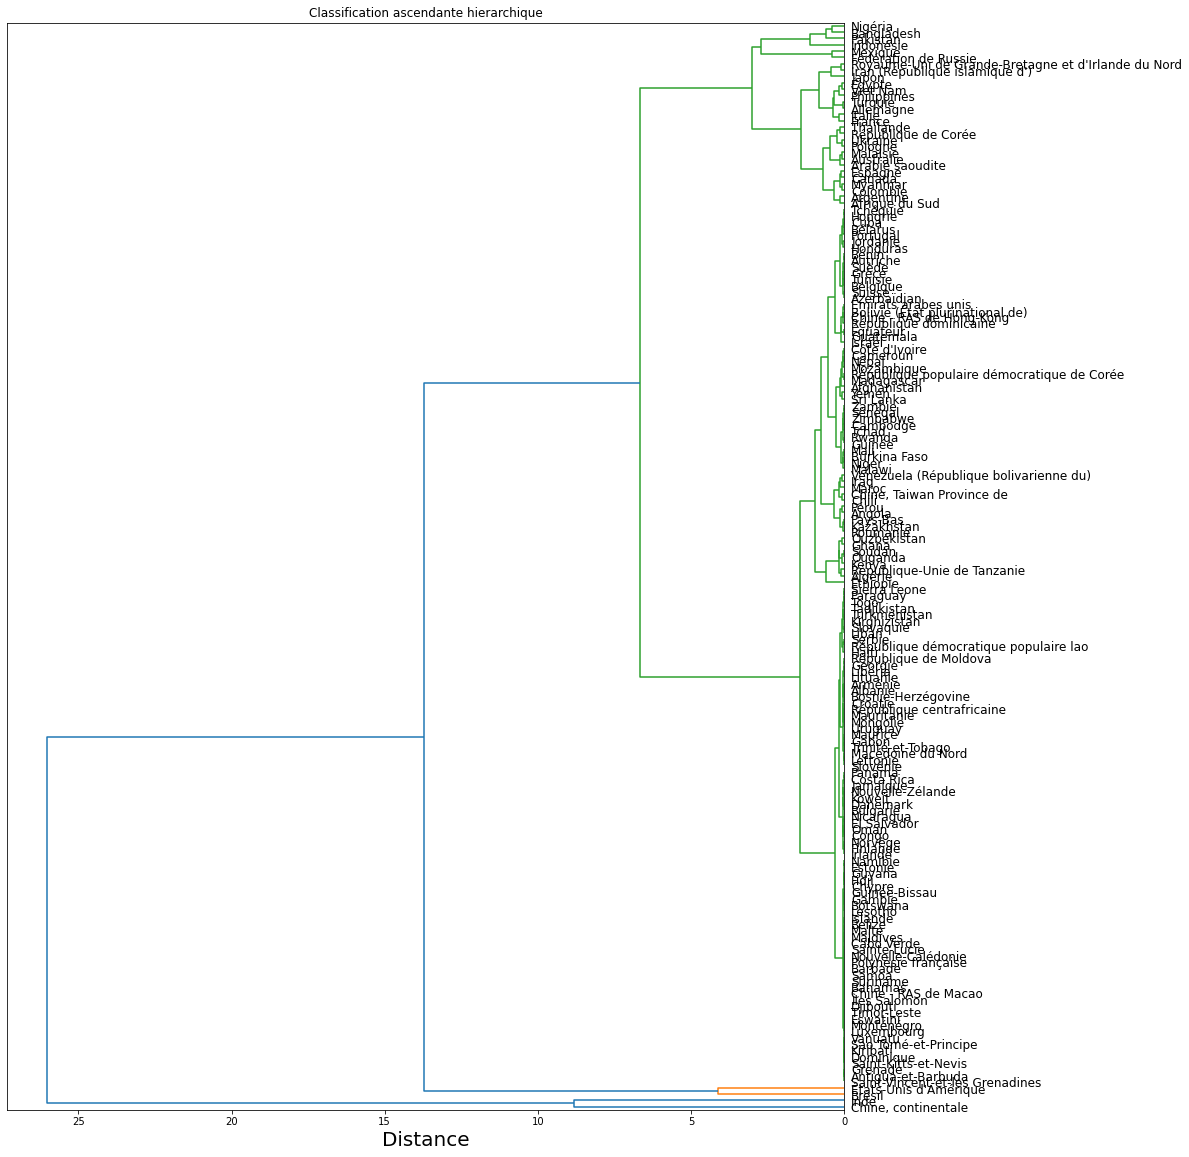

In [593]:
## On affiche notre premier dendrogramme

fig =plt.figure(figsize=(15,20))
plt.title('Classification ascendante hierarchique', fontsize=12)
plt.xlabel('Distance', fontsize=20)

dendrogram(Z, labels = tableau.index, leaf_font_size=12, color_threshold= 7, orientation='left')

plt.show()

Que voit-on ? 

On voit trois clusters principaux. Un est composé des Etats-Unis et du Brésil, un autre de la Chine continentale et de l'Inde et enfin le dernier est composé de tout les autres pays ! Je répète : Un cluster est composé de tous les autres pays.


On voit que la distance entre ces clusters est grande. La distance entre le groupe Etat-unis/Brésil et le cluster regourpant tout les autres pays à l'exception de la Chine et de l'Inde est de presque 15.

Tandis que la distance entre le groupe formé par tout les pays et les états unis

Le résultat est très interessant ! Presque attendu ! Il faut se rappeler qu'on a chercher à minimiser la variance intracluster. 

Ce qu'il faut comprendre c'est qu'en comparaison avec L'Inde, la Chine, Les Etats Unis, et le Bresil, tout les autres pays sont plus ou moins identiques ...

Pourquoi ça ?  

On se rappelle que notre dataframe est composé de trois données :
- La disponibilité alimentaire en Tonne
- La disponibilité alimentaire en ce qui concerne la viande de volailles en Tonne 
- La population 

On le sait en terme de population la Chine et l'Inde tiennent le haut du podium ! On peut aussi se dire que pour ce qui est des USA ( première puissante modiale ) le marché alimentaire et sans commune mesure avec celui des autres pays 

Il faut se rappeler qu'on a chercher à minimiser la variance intracluster et que quand on cherche à faire ça avec des pays aussi particuliers que L'Inde, la Chine, Les Etats Unis, et le Bresil ces derniers jouent clairement le rôle d'outliers ce sont des valeurs extrèmes !  Pour gérer ce "problème"  on va créer un df sans inclure ces quatres pays ... On gérera plus leurs analyse plus tard .

On pourrait même d'ores et déjà s'en passer en expliquant que dans ces pays: 
- la taille du marché alimentaire est énorme,
- la taille du marché de la viande de volialle est énorme,
- la taille de la population est énorme,

La question qui sera peut être determinante est de savoir si la population est assez riche .

On crée un subset avec nos 4 outliers.

In [594]:
# sélectionner les lignes avec les pays souhaités
df_subset = tableau.loc[['Inde', 'Chine, continentale',"États-Unis d'Amérique", "Brésil"]]
#"États-Unis d'Amérique", 'Brésil'

In [595]:
df_subset.head()

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an)
Zone,,,
Inde,1338676785.00,710583024.25,2971862.46
"Chine, continentale",1421021791.00,1376288025.02,17521198.68
États-Unis d'Amérique,325084756.00,321957440.65,18100719.21
Brésil,207833823.00,160133882.28,9982258.52


Et on supprime ces 4 pays de nos données initiales pour recommencer notre dendrogramme et voir ce qu'il se passe.

In [596]:
# sélectionner les lignes sans les pays souhaités
tableau = tableau.loc[~tableau.index.isin(["Inde", "Chine, continentale","États-Unis d'Amérique", "Brésil"])]

On reesaye cette fois-ci sans nos quatres Mastodonte ! A nouveau on enregistre nos valeurs dans une variable X

In [597]:
X= tableau.values

In [598]:
X.shape

(168, 3)

On a bien 4 lignes de moins

On normalise nos données

In [599]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

On utilise la méthode linkage avec nos données normalisées et la méthode de ward pour minimiser l'augmentation de la variance intracluster

In [600]:
Z = linkage(X_scaled, method="ward")

Et on affiche notre dendrogramme

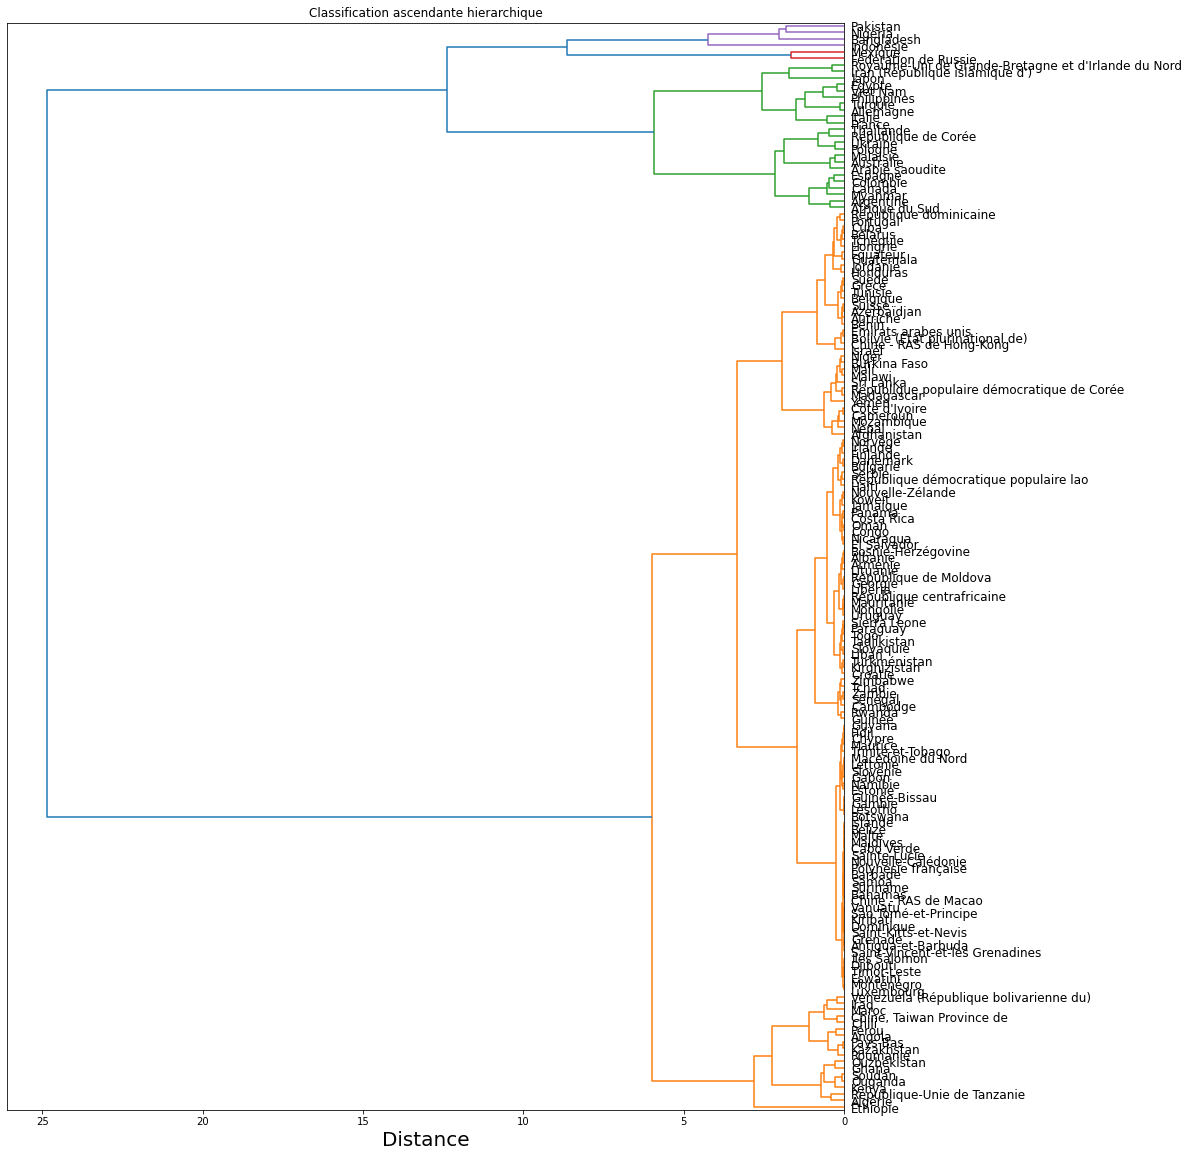

In [601]:
#On affiche notre deuxième dendrogramme

fig =plt.figure(figsize=(15,20))
plt.title('Classification ascendante hierarchique', fontsize=12)
plt.xlabel('Distance', fontsize=20)

dendrogram(Z, labels = tableau.index, leaf_font_size=12, color_threshold= 7, orientation='left')

plt.show()

C'est mieux mais pas idéal. On a toutefois des groupes déjà interessant. On va, pour optimiser notre clustering, comme on le présentait ajouter d'autres colonnes. Et si on s'interessait à essayer de grouper nos pays par marché et population mais qu'on ajoutait aussi une nouvelle dimension économique à savoir le pib par habitant . Il serait interessant de savoir si les habitant ( nos clients ) pourrait se payer nos produits .

On enregistre nos données dans une variable 'pib'

In [602]:
pib= pd.read_csv("pib par habitant en usd.csv")
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.62,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.88,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.20,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.70,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44651.83,X,Ciffre de sources internationales,NaN


Comme précédemment on supprime les colonnes inutiles 

In [603]:
pib= pib.drop(["Code Domaine",
               "Domaine",
               "Code zone (M49)",
               "Code Élément",
               "Code Produit",
               "Produit",
               "Code année",
               "Année",
               "Symbole",
               "Description du Symbole",
               "Note",
               "Unité",
               "Élément"], axis=1)

On jette un coup d'oeil aux données.

In [604]:
pib

,Zone,Valeur
0,Afghanistan,520.62
1,Afrique du Sud,6121.88
2,Albanie,4514.20
3,Algérie,4109.70
4,Allemagne,44651.83
...,...,...
206,Venezuela (République bolivarienne du),8432.29
207,Viet Nam,2365.52
208,Yémen,745.09
209,Zambie,1534.87


Parfait on renomme nos colonnes grace à la méthode .rename()

In [605]:
pib.rename(columns={"Valeur": "P.I.B par hab. en $"},inplace=True)

Et on merge nos deux df

In [606]:
tableau= pd.merge(tableau, pib, on='Zone', how='left')

On jette un oeil à la structure de nos données avec la méthode .info()

In [607]:
tableau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zone                    168 non-null    object 
 1   Pop.                    168 non-null    float64
 2   Dsp. Alim. (To/an)      168 non-null    float64
 3   Dsp. Alim. Vol.(To/an)  168 non-null    float64
 4   P.I.B par hab. en $     167 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


On a une valeur manquante, que l'on recherche grace à l'addition des méthodes .isnull() et any()

In [608]:
tableau[tableau.isnull().any(axis=1)]

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $
32,"Chine, Taiwan Province de",23674546.00,15160469.02,785284.69,NaN


On fait le choix de supprimer ce pays de nos données 

In [609]:
tableau=tableau.dropna()

On vérifie 

In [610]:
tableau[tableau.isnull().any(axis=1)]

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $


Parfait on passe au dendrogramme, afin de voir comment l'ajout d'un nouveau critère change notre clustering. Mais nous ajouterons plus tard la dimension de "Stabilité politique".

In [611]:
tableau.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88
2,Albanie,2884169.00,3635466.18,47185.00,4514.20
3,Algérie,41389189.00,33057959.15,264063.03,4109.70
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83


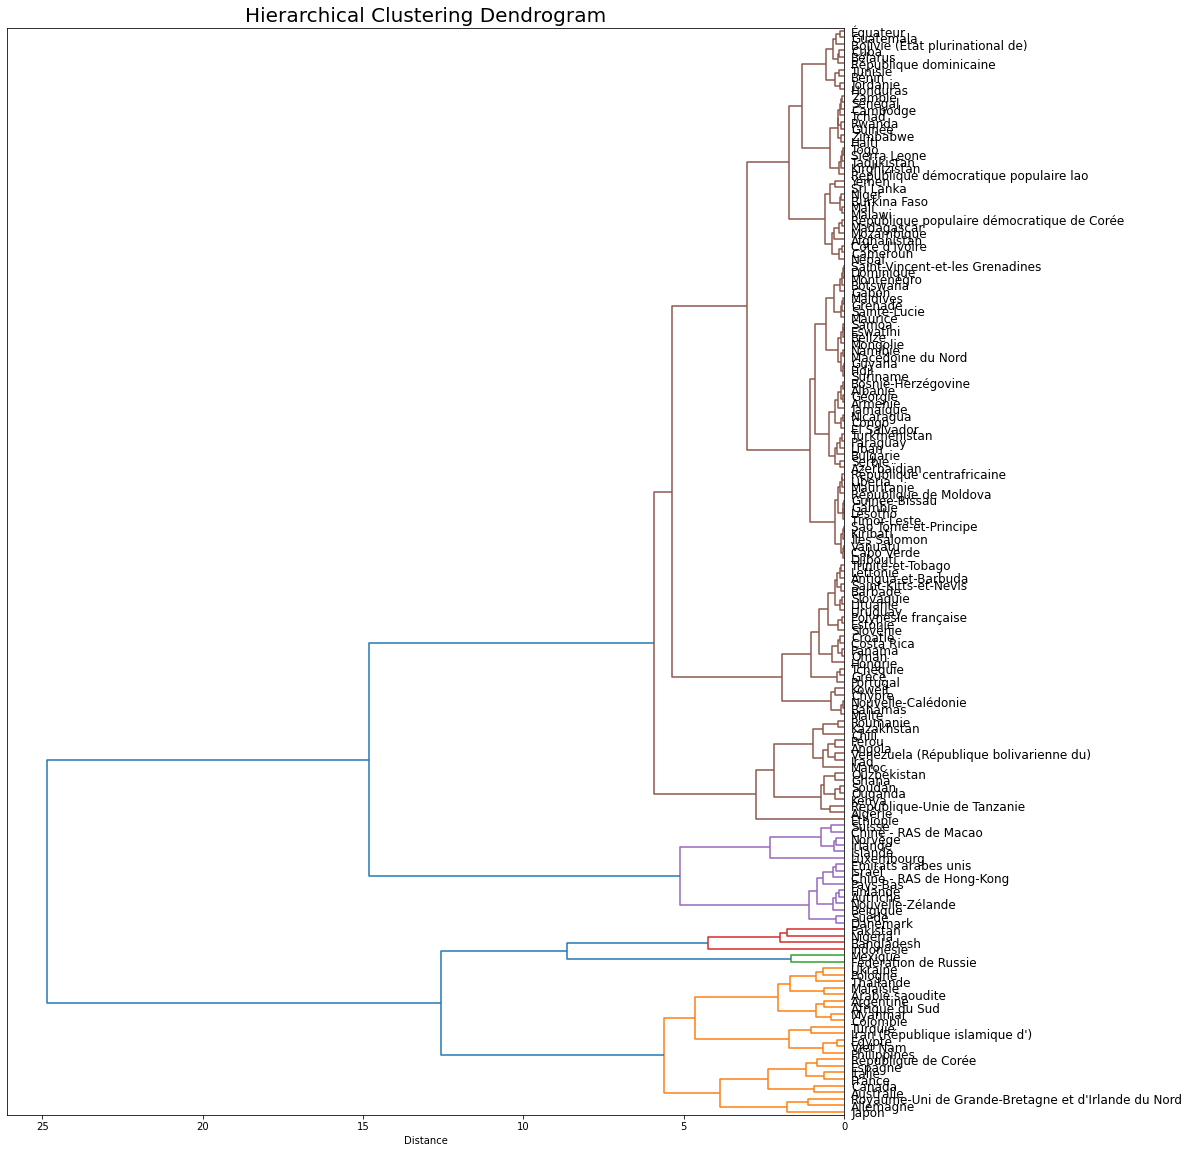

In [612]:
#Mise en index de "Zone"
tableau.set_index("Zone",inplace=True)

# enregistrement des valeurs dans une variable X
X= tableau.values

# Normalisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul de Z avec les données normalisé et la méthode de Ward
Z = linkage(X_scaled, method="ward")

#Affichage d'un troisième dendrogramme ( par curiosité)
fig =plt.figure(figsize=(15,20))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = tableau.index, leaf_font_size=12, color_threshold=7, orientation='left')

plt.show()

# Ajout du critère "stabilité politique".

On enregistre notre df dans une variable stabilite_politique.

In [613]:
stabilite_politique= pd.read_csv("PoliticalStability.csv")

On jette un oeil à nos 5 premieres lignes

In [614]:
stabilite_politique.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


On selectionne uniquement les données pour l'année 2017

In [615]:
stabilite_politique= stabilite_politique[stabilite_politique['Year'] == 2017]

On vérifie que tout s'est bien passé.

In [616]:
stabilite_politique.head()

,Country,Year,Political_Stability,Granularity
16,Afghanistan,2017,-2.80,Total
34,Albania,2017,0.38,Total
52,Algeria,2017,-0.92,Total
67,American Samoa,2017,1.22,Total
85,Andorra,2017,1.42,Total


On ne garde que Les colonne relative au pays et à la valeur de la stabilité politique

In [617]:
stabilite_politique=stabilite_politique[["Country","Political_Stability"]]

On vérifie

In [618]:
stabilite_politique.head()

,Country,Political_Stability
16,Afghanistan,-2.80
34,Albania,0.38
52,Algeria,-0.92
67,American Samoa,1.22
85,Andorra,1.42


On peut se rendre compte qu'il va y avoir un problème avec la jointure, si on garde le nom des pays en anglais. On va changer le nom de nos pays en créany un dictionnaire avec les noms des pays en anglais comme clés et les noms des pays en français comme valeurs. On enregistre ce dictionnaire dans une variable **pays_dict**

In [619]:
pays_dict = {
    'Afghanistan': 'Afghanistan',
    'Albania': 'Albanie',
    'Algeria': 'Algérie',
    'American Samoa': 'Samoa américaines',
    'Andorra': 'Andorre',
    'Angola': 'Angola',
    'Antigua and Barbuda': 'Antigua-et-Barbuda',
    'Argentina': 'Argentine',
    'Armenia': 'Arménie',
    'Australia': 'Australie',
    'Austria': 'Autriche',
    'Azerbaijan': 'Azerbaïdjan',
    'Bahamas': 'Bahamas',
    'Bahrain': 'Bahreïn',
    'Bangladesh': 'Bangladesh',
    'Barbados': 'Barbade',
    'Belarus': 'Bélarus',
    'Belgium': 'Belgique',
    'Belize': 'Belize',
    'Benin': 'Bénin',
    'Bermuda': 'Bermudes',
    'Bhutan': 'Bhoutan',
    'Bolivia (Plurinational State of)': 'Bolivie (État plurinational de)',
    'Bosnia and Herzegovina': 'Bosnie-Herzégovine',
    'Botswana': 'Botswana',
    'Brazil': 'Brésil',
    'Brunei Darussalam': 'Brunéi Darussalam',
    'Bulgaria': 'Bulgarie',
    'Burkina Faso': 'Burkina Faso',
    'Burundi': 'Burundi',
    'Cabo Verde': 'Cabo Verde',
    'Cambodia': 'Cambodge',
    'Cameroon': 'Cameroun',
    'Canada': 'Canada',
    'Central African Republic': 'République centrafricaine',
    'Chad': 'Tchad',
    'Chile': 'Chili',
    'China, Hong Kong SAR': 'Chine - RAS de Hong-Kong',
    'China, Macao SAR': 'Chine - RAS de Macao',
    'China, mainland': 'Chine, continentale',
    'China, Taiwan Province of': 'Taïwan',
    'Colombia': 'Colombie',
    'Comoros': 'Comores',
    'Congo': 'Congo',
    'Costa Rica': 'Costa Rica',
    "Côte d'Ivoire": 'Côte d\'Ivoire',
    'Croatia': 'Croatie',
    'Cuba': 'Cuba',
    'Cyprus': 'Chypre',
    'Czechia': 'Tchéquie',
    "Democratic People's Republic of Korea": 'République populaire démocratique de Corée',
    'Democratic Republic of the Congo': 'République démocratique du Congo',
    'Denmark': 'Danemark',
    'Djibouti': 'Djibouti',
    'Dominica': 'Dominique',
    'Dominican Republic': 'République dominicaine',
    'Ecuador': 'Équateur',
    'Egypt': 'Égypte',
    'El Salvador': 'El Salvador',
    'Equatorial Guinea': 'Guinée équatoriale',
    'Eritrea': 'Érythrée',
    'Estonia': 'Estonie',
    'Eswatini': 'Eswatini',
    'Ethiopia': 'Éthiopie',
    'Fiji': 'Fidji',
    'Finland': 'Finlande',
    'France': 'France',
    'Gabon': 'Gabon',
    'Gambia': 'Gambie',
    'Georgia': 'Géorgie',
    'Germany': 'Allemagne',
    'Ghana': 'Ghana',
    'Greece': 'Grèce',
    'Greenland': 'Groenland',
    'Grenada': 'Grenade',
    'Guatemala': 'Guatemala',
    'Guinea': 'Guinée',
    'Guinea-Bissau': 'Guinée-Bissau',
    'Guyana': 'Guyana',
    'Haiti': 'Haïti',
    'Honduras': 'Honduras',
    'Hungary': 'Hongrie',
    'Iceland': 'Islande',
    'India': 'Inde',
    'Indonesia': 'Indonésie',
    "Iran (Islamic Republic of)": "Iran (République islamique d')",
    'Iraq': 'Iraq',
    'Ireland': 'Irlande',
    'Israel': 'Israël',
    'Italy': 'Italie',
    'Jamaica': 'Jamaïque',
    'Japan': 'Japon',
    'Jordan': 'Jordanie',
    'Kazakhstan': 'Kazakhstan',
    'Kenya': 'Kenya',
    'Kiribati': 'Kiribati',
    'Kuwait': 'Koweït',
    'Kyrgyzstan': 'Kirghizistan',
    "Lao People's Democratic Republic": 'République démocratique populaire lao',
    'Latvia': 'Lettonie',
    'Lebanon': 'Liban',
    'Lesotho': 'Lesotho',
    'Liberia': 'Libéria',
    'Libya': 'Libye',
    'Lithuania': 'Lituanie',
    'Luxembourg': 'Luxembourg',
    'Madagascar': 'Madagascar',
    'Malawi': 'Malawi',
    'Malaysia': 'Malaisie',
    'Maldives': 'Maldives',
    'Mali': 'Mali',
    'Malta': 'Malte',
    'Marshall Islands': 'Îles Marshall',
    'Mauritania': 'Mauritanie',
    'Mauritius': 'Maurice',
    'Mexico': 'Mexique',
    'Micronesia (Federated States of)': 'Micronésie',
    'Mongolia': 'Mongolie',
    'Montenegro': 'Monténégro',
    'Morocco': 'Maroc',
    'Mozambique': 'Mozambique',
    'Myanmar': 'Myanmar',
    'Namibia': 'Namibie',
    'Nauru': 'Nauru',
    'Nepal': 'Népal',
    'Netherlands': 'Pays-Bas',
    'New Zealand': 'Nouvelle-Zélande',
    'Nicaragua': 'Nicaragua',
    'Niger': 'Niger',
    'Nigeria': 'Nigéria',
    'North Macedonia': 'Macédoine du Nord',
    'Norway': 'Norvège',
    'Oman': 'Oman',
    'Pakistan': 'Pakistan',
    'Palau': 'Palaos',
    'Palestine': 'Palestine',
    'Panama': 'Panama',
    'Papua New Guinea': 'Papouasie-Nouvelle-Guinée',
    'Paraguay': 'Paraguay',
    'Peru': 'Pérou',
    'Philippines': 'Philippines',
    'Poland': 'Pologne',
    'Portugal': 'Portugal',
    'Puerto Rico': 'Porto Rico',
    'Qatar': 'Qatar',
    'Republic of Korea': 'République de Corée',
    'Republic of Moldova': 'République de Moldova',
    'Romania': 'Roumanie',
    'Russian Federation': 'Fédération de Russie',
    'Rwanda': 'Rwanda',
    'Saint Kitts and Nevis': 'Saint-Kitts-et-Nevis',
    'Saint Lucia': 'Sainte-Lucie',
    'Saint Vincent and the Grenadines': 'Saint-Vincent-et-les Grenadines',
    'Samoa': 'Samoa',
    'Sao Tome and Principe': 'Sao Tomé-et-Principe',
    'Saudi Arabia': 'Arabie saoudite',
    'Senegal': 'Sénégal',
    'Serbia': 'Serbie',
    'Seychelles': 'Seychelles',
    'Sierra Leone': 'Sierra Leone',
    'Singapore': 'Singapour',
    'Slovakia': 'Slovaquie',
    'Slovenia': 'Slovénie',
    'Solomon Islands': 'Îles Salomon',
    'Somalia': 'Somalie',
    'South Africa': 'Afrique du Sud',
    'South Sudan': 'Soudan du Sud',
    'Spain': 'Espagne',
    'Sri Lanka': 'Sri Lanka',
    'Sudan': 'Soudan',
    'Suriname': 'Suriname',
    'Sweden': 'Suède',
    'Switzerland': 'Suisse',
    'Syrian Arab Republic': 'République arabe syrienne',
    'Tajikistan': 'Tadjikistan',
    'Thailand': 'Thaïlande',
    'Timor-Leste': 'Timor-Leste',
    'Togo': 'Togo',
    'Tonga': 'Tonga',
    'Trinidad and Tobago': 'Trinité-et-Tobago',
    'Tunisia': 'Tunisie',
    'Turkey': 'Turquie',
    'Turkmenistan': 'Turkménistan',
    'Tuvalu': 'Tuvalu',
    'Uganda': 'Ouganda',
    'Ukraine': 'Ukraine',
    'United Arab Emirates': 'Émirats arabes unis',
    'United Kingdom of Great Britain and Northern Ireland': 'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord',
    'United Republic of Tanzania': 'République-Unie de Tanzanie',
    'United States of America': 'États-Unis d\'Amérique',
    'Uruguay': 'Uruguay',
    'Uzbekistan': 'Ouzbékistan',
    'Vanuatu': 'Vanuatu',
    'Venezuela (Bolivarian Republic of)': 'Venezuela (République bolivarienne du)',
    'Viet Nam': 'Viet Nam',
    'Yemen': 'Yémen',
    'Zambia': 'Zambie',
    'Zimbabwe': 'Zimbabwe'
    }

On remplace la colonne "pays" en anglais par la colonne "pays" en français grace à une fonction lambda.

In [620]:
stabilite_politique.loc[:, 'Country'] = stabilite_politique['Country'].apply(lambda x: pays_dict.get(x, x))

La fonction lambda prend en entrée un élément "x" de la colonne "Country" et applique la méthode "get" du dictionnaire "pays_dict" sur cet élément, en utilisant "x" comme clé. Si la clé "x" est présente dans le dictionnaire, la valeur correspondante est retournée. Sinon, la clé elle-même (c'est-à-dire "x") est retournée.

Ainsi, en utilisant cette fonction lambda, la colonne "Country" du dataframe "stabilite_politique" est remplacée par les valeurs du dictionnaire "pays_dict" correspondantes aux noms de pays présents dans la colonne "Country". Si le nom de pays n'est pas présent dans le dictionnaire, il est conservé tel quel.

On vérifie

In [621]:
stabilite_politique.head()

,Country,Political_Stability
16,Afghanistan,-2.80
34,Albanie,0.38
52,Algérie,-0.92
67,Samoa américaines,1.22
85,Andorre,1.42


Cela semble avoir marché ! On change le nom de la colonne Country pour "Zone".

In [622]:
stabilite_politique = stabilite_politique.rename(columns={'Country': 'Zone'})

On vérifie 

In [623]:
stabilite_politique.head()

,Zone,Political_Stability
16,Afghanistan,-2.80
34,Albanie,0.38
52,Algérie,-0.92
67,Samoa américaines,1.22
85,Andorre,1.42


On fait la jointure entre notre df et le df "stabilite_politique"

In [624]:
tableau= pd.merge(tableau, stabilite_politique, on='Zone', how='left')

On jette un oeil à la structure des données

In [625]:
tableau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zone                    167 non-null    object 
 1   Pop.                    167 non-null    float64
 2   Dsp. Alim. (To/an)      167 non-null    float64
 3   Dsp. Alim. Vol.(To/an)  167 non-null    float64
 4   P.I.B par hab. en $     167 non-null    float64
 5   Political_Stability     165 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.1+ KB


On a deux valeurs nulles qu'on recherche avec .isnull().any()

In [626]:
tableau[tableau.isnull().any(axis=1)]

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
104,Nouvelle-Calédonie,277150.00,161991.40,10728.48,33101.38,NaN
116,Polynésie française,276102.00,187404.23,13087.23,21127.53,NaN


On fait le choix de supprimer ces lignes 

In [627]:
tableau= tableau.dropna()

On vérifie.

In [628]:
tableau[tableau.isnull().any(axis=1)]

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability


Parfait ! On passe maintenant au dendrogramme !

In [629]:
tableau.head()

,Zone,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
0,Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80
1,Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28
2,Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38
3,Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92
4,Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59


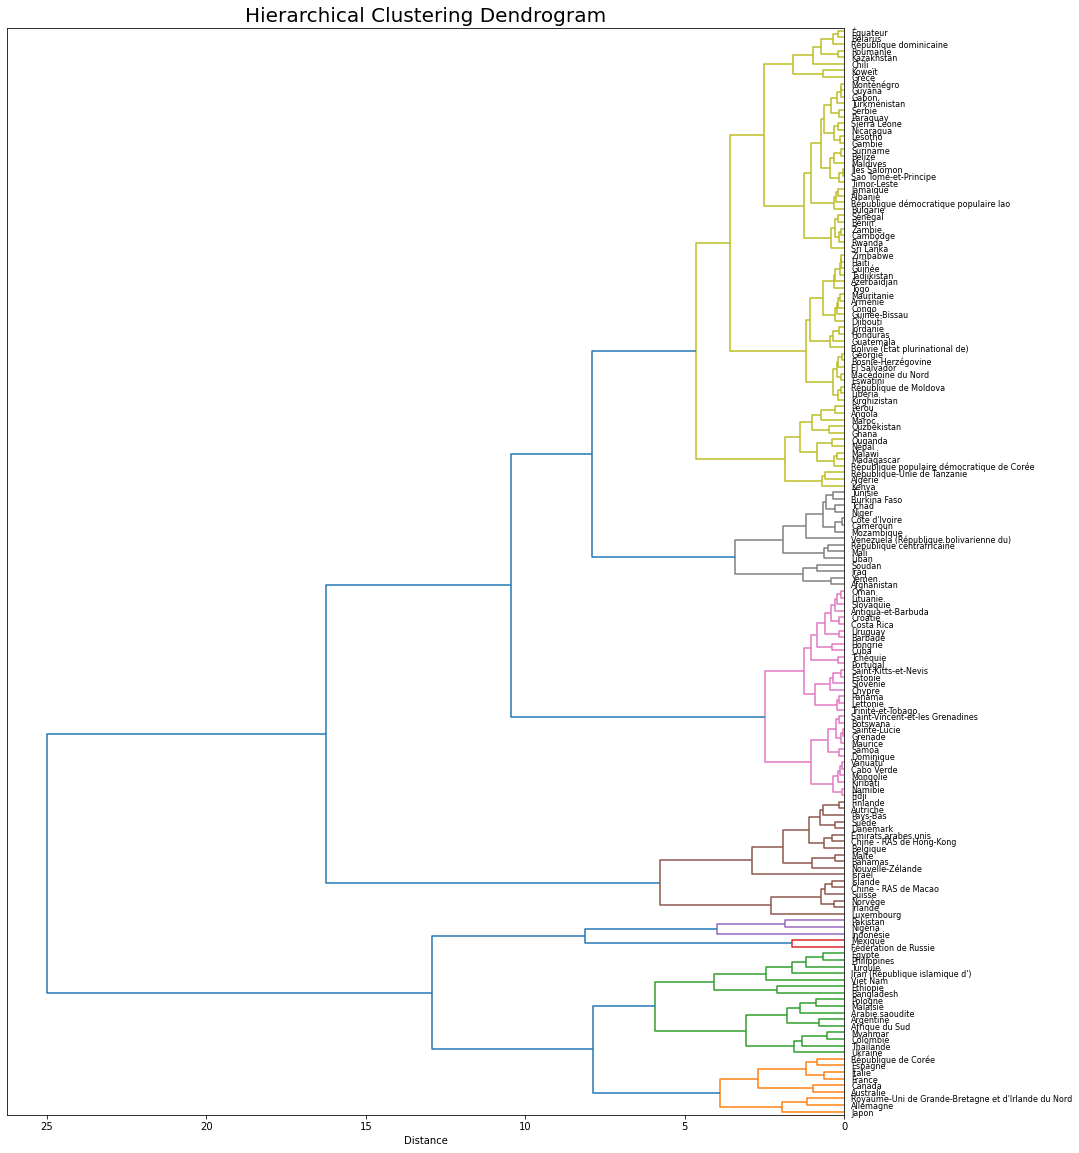

In [630]:
# Mise en index de "Zone"
tableau.set_index("Zone",inplace=True)

# enregistrement des valeurs dans une variable X
X= tableau.values

# Normalisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul de Z avec les données normalisé et la méthode de Ward
Z = linkage(X_scaled, method="ward")

#Affichage d'un troisième dendrogramme ( par curiosité)
fig =plt.figure(figsize=(15,20))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = tableau.index, leaf_font_size=8, color_threshold=7, orientation='left')

plt.show()

On fait créer un tableau de corrélations afin de voir les variables les plus liées les une aux autres 

In [631]:
tableau.iloc[:, :].corr()

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
Pop.,1.00,0.96,0.66,-0.10,-0.40
Dsp. Alim. (To/an),0.96,1.00,0.77,-0.03,-0.32
Dsp. Alim. Vol.(To/an),0.66,0.77,1.00,0.09,-0.14
P.I.B par hab. en $,-0.10,-0.03,0.09,1.00,0.55
Political_Stability,-0.40,-0.32,-0.14,0.55,1.00


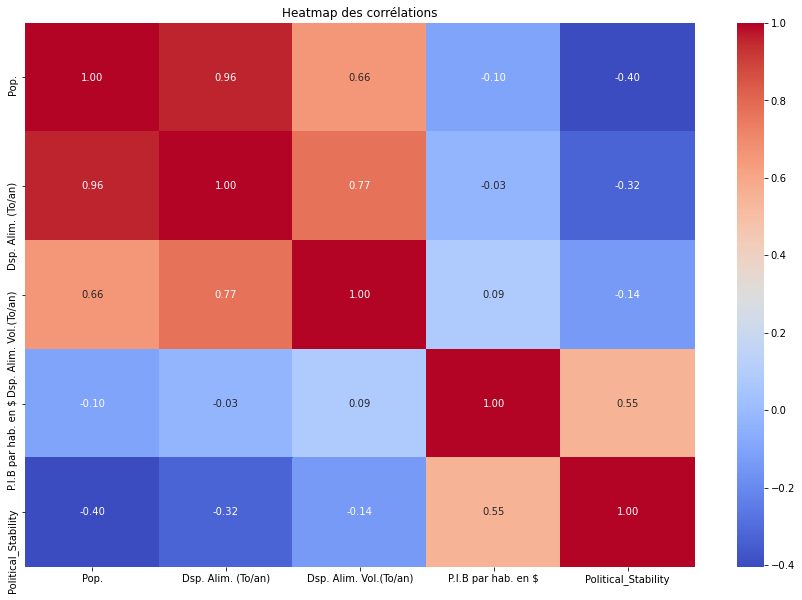

In [632]:
#HeatMap des corrélations linéaires à partir de la matrice précédente
plt.figure(figsize=(15, 10))
sns.heatmap(tableau.iloc[:, :].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap des corrélations')

plt.show()

On remarque que les variables Population Disponibilité alimentaire et Disponibilité alimentaire de Volaille sont très corrélées, ce qui est évident, plus la population est grande plus la dispoinibilité alimentaire l'est 

Parfait ! On enregistre nos données dans de nouveau csv et on passe à la prochaine étape: les clustering et les visualisations.

In [633]:
tableau.to_csv("Tableau.csv",index=True)

In [634]:
tableau

,Pop.,Dsp. Alim. (To/an),Dsp. Alim. Vol.(To/an),P.I.B par hab. en $,Political_Stability
Zone,,,,,
Afghanistan,36296113.00,12968964.14,55533.05,520.62,-2.80
Afrique du Sud,57009756.00,31721368.43,2034678.19,6121.88,-0.28
Albanie,2884169.00,3635466.18,47185.00,4514.20,0.38
Algérie,41389189.00,33057959.15,264063.03,4109.70,-0.92
Allemagne,82658409.00,77966717.71,1609359.22,44651.83,0.59
...,...,...,...,...,...
Égypte,96442591.00,72101445.46,1249895.98,2023.33,-1.42
Émirats arabes unis,9487203.00,5954832.71,412408.71,40644.80,0.62
Équateur,16785361.00,9460565.17,324125.32,6213.50,-0.07


In [521]:
df_subset.to_csv("df_subset.csv", index=True)

In [522]:
stabilite_politique.to_csv("stabilite_politique.csv", index=False)

In [523]:
pib.to_csv("pibhab.csv",index=False)